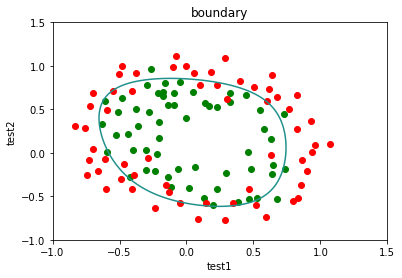

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import scipy.optimize as opt
from sklearn.metrics import classification_report


# 读取数据
def raw_data(path):
    data=pd.read_csv(path,names=['test1','test2','accept'])
    return data


# 画出原始数据
def draw_data(data):
    accept=data[data['accept'].isin(['1'])]
    reject=data[data['accept'].isin(['0'])]
    plt.scatter(accept['test1'],accept['test2'],c='g')
    plt.scatter(reject['test1'],reject['test2'],c='r')
    plt.title('raw_data')
    plt.xlabel('test1')
    plt.ylabel('test2')
    return plt


# 特征映射
def feature_mapping(x1,x2,power):
    datamap={}
    for i in range(power+1):
        for j in range(i+1):
            datamap["f{}{}".format(j,i-j)]=np.power(x1,j)*np.power(x2,i-j)
    return pd.DataFrame(datamap)


def sigmoid(z):
    return 1/(1+np.exp(-z))


# 正则化代价函数
def regularized_cost_function(theta,x,y,lam):
    m=x.shape[0]
    j=((y.dot(np.log(sigmoid(x.dot(theta)))))+((1-y).dot(np.log(1-sigmoid(x.dot(theta))))))/-m
    penalty=lam*(theta.dot(theta))/(2*m)
    return j+penalty


# 计算偏导数
def regularized_gradient_descent(theta,x,y,lam):
    m=x.shape[0]
    partial_j=((sigmoid(x.dot(theta))-y).T).dot(x)/m
    partial_penalty=lam*theta/m
    # 不惩罚第一项
    partial_penalty[0]=0
    return partial_j+partial_penalty


def predict(theta,x):
    h=x.dot(theta)
    return [1 if x>=0.5 else 0 for x in h]


def boundary(theta,data):
    """
    [X,Y] = meshgrid(x,y)
    将向量x和y定义的区域转换成矩阵X和Y,
    其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制
    假设x是长度为m的向量，y是长度为n的向量，则最终生成的矩阵X和Y的维度都是 nm（注意不是mn）
    """
    # 绘制方程theta*x=0
    x = np.linspace(-1, 1.5, 200)
    x1, x2 = np.meshgrid(x, x)
    z = feature_mapping(x1.ravel(), x2.ravel(), 6).values
    z = z.dot(theta)
    # print(xx.shape)  # (200,200)
    # print(z.shape)  # (40000,)
    z=z.reshape(x1.shape)
    plt=draw_data(data)
    plt.contour(x1,x2,z,0)
    plt.title('boundary')
    plt.show()


def main():
    rawdata=raw_data('D:\\andrew_ml_ex22391\\ex2data2.txt')
    # print(rawdata.head())
    # plt=draw_data(rawdata)
    # plt.show()
    data=feature_mapping(rawdata['test1'],rawdata['test2'],power=6)
    # print(data.head())
    x=data.values
    y=rawdata['accept']
    theta=np.zeros(x.shape[1])
    '''
    print(type(x))
    print(type(y))
    print(type(data))
    print(x.shape)
    print(y.shape)
    print(theta.shape)
    '''
    # print(regularized_cost_function(theta,x,y,1))  #0.6931471805599454
    theta=opt.minimize(fun=regularized_cost_function,x0=theta,args=(x,y,1),method='tnc',jac=regularized_gradient_descent).x
    # print(regularized_cost_function(theta,x,y,1))  # 0.5357749513533407
    # print(classification_report(predict(theta,x),y))
    boundary(theta,rawdata)


main()
